In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


















In [4]:
# Step 1: Data Collection
df = pd.read_csv('C:\\Users\\moham\\Downloads\\archive (1)\\HousingPrices-Amsterdam-August-2021.csv')


In [5]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price  

In [6]:
# Step 3: Data Preprocessing
df.fillna(0, inplace=True)

In [9]:
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_neighborhood = encoder.fit_transform(df[['Area']])
df_encoded = pd.concat([df.drop(['Area'], axis=1), pd.DataFrame(encoded_neighborhood)], axis=1)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
print(df.columns)


Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')


In [11]:
# Step 4: Feature Selection
selected_features = ['Area', 'Room', 'Lon', 'Lat']  # Add more features as needed



In [12]:
# Step 5: Model Selection
# Select a regression model
model = RandomForestRegressor()


In [13]:
# Step 6: Data Split
# Split the dataset into training and testing sets
X = df[selected_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 7: Model Training
# Train the regression model
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# Step 8: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 133824.41626512227
Mean Squared Error: 83328664264.50473
Root Mean Squared Error: 288667.0474170974
R-squared: 0.8341947378469512


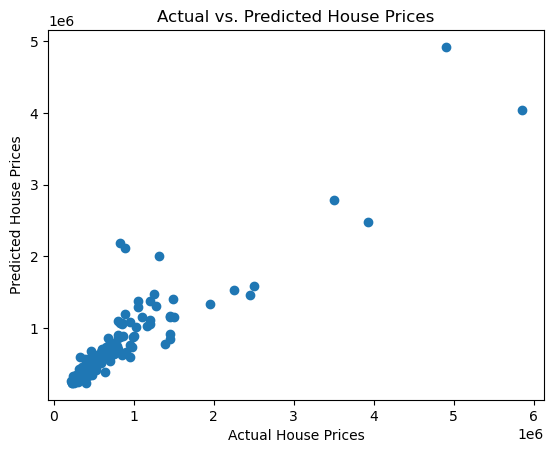

In [16]:
# Step 9: Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()